In [1]:
import os

import tensorflow as tf
from tensorflow.keras import Model, callbacks
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import (Dense, Dropout, GlobalAveragePooling2D,
                                     Input)
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_dir = '/kaggle/input/tes2plant/Valid/Train'
val_dir = '/kaggle/input/tes2plant/Valid/Valid'
test_dir = '/kaggle/input/tes2plant/Valid/test'

disease = os.listdir(train_dir)
print(f'Jumlah class : {len(disease)}')

Jumlah class : 30


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    fill_mode = 'nearest',
                                    rotation_range = 20,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    horizontal_flip= True
)

validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)



Found 52149 images belonging to 30 classes.
Found 13041 images belonging to 30 classes.


In [4]:
CNN = Sequential()

CNN.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
CNN.add(BatchNormalization())
CNN.add(Activation('relu'))
CNN.add(Conv2D(128, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
CNN.add(BatchNormalization())
CNN.add(Activation('relu'))
CNN.add(MaxPool2D(pool_size=(3, 3)))

CNN.add(Conv2D(128, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
CNN.add(BatchNormalization())
CNN.add(Activation('relu'))
CNN.add(Conv2D(128, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
CNN.add(BatchNormalization())
CNN.add(Activation('relu'))

CNN.add(Conv2D(256, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
CNN.add(BatchNormalization())
CNN.add(Activation('relu'))
CNN.add(MaxPool2D(pool_size=(3, 3)))

CNN.add(Conv2D(512, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
CNN.add(BatchNormalization())
CNN.add(Activation('relu'))
CNN.add(MaxPool2D(pool_size=(3, 3)))

CNN.add(Conv2D(512, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
CNN.add(BatchNormalization())
CNN.add(Activation('relu'))

CNN.add(Conv2D(512, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
CNN.add(BatchNormalization())
CNN.add(Activation('relu'))
CNN.add(MaxPool2D(pool_size=(3, 3)))

CNN.add(Flatten())
CNN.add(Dense(2048, activation='relu'))
CNN.add(Dropout(0.5))
CNN.add(Dense(2048, activation='relu'))
CNN.add(Dropout(0.5))
CNN.add(Dense(30, activation='softmax'))

CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 128)     73856     
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 128)    512       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 224, 224, 128)     0

In [5]:
CNN.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
early_stopping_cb = callbacks.EarlyStopping(monitor="val_loss", patience=3)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                              factor=0.2, 
                                              patience=2,
                                              verbose=1, 
                                              min_lr=1e-7)

checkpoint_path = "./Checkpoint/"
model_checkpoint = callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      save_best_only=True,
                                                      monitor="val_loss")

initial_epochs = 15

history = CNN.fit(train_generator,
                    epochs=initial_epochs,
                    validation_data=validation_generator,
                    callbacks=[early_stopping_cb, model_checkpoint, reduce_lr])

Epoch 1/15
1630/1630 [==============================] - 861s 520ms/step - loss: 1.7400 - accuracy: 0.4535 - val_loss: 2.0054 - val_accuracy: 0.4804 - lr: 0.0010
Epoch 2/15
1630/1630 [==============================] - 730s 448ms/step - loss: 0.7216 - accuracy: 0.7636 - val_loss: 1.5283 - val_accuracy: 0.6463 - lr: 0.0010
Epoch 3/15
1630/1630 [==============================] - 738s 453ms/step - loss: 0.4482 - accuracy: 0.8571 - val_loss: 0.4571 - val_accuracy: 0.8559 - lr: 0.0010
Epoch 4/15
1630/1630 [==============================] - 735s 451ms/step - loss: 0.3340 - accuracy: 0.8984 - val_loss: 0.3604 - val_accuracy: 0.8963 - lr: 0.0010
Epoch 5/15
1630/1630 [==============================] - 747s 458ms/step - loss: 0.2741 - accuracy: 0.9157 - val_loss: 0.4716 - val_accuracy: 0.8697 - lr: 0.0010
Epoch 6/15
1630/1630 [==============================] - 742s 455ms/step - loss: 0.2344 - accuracy: 0.9279 - val_loss: 0.2791 - val_accuracy: 0.9360 - lr: 0.0010
Epoch 7/15
1630/1630 [============

In [7]:
CNN.save('./CNNmodif.h5')
CNN.save('./CNNmodif')
CNN.save('./CNNmodif.tflite')

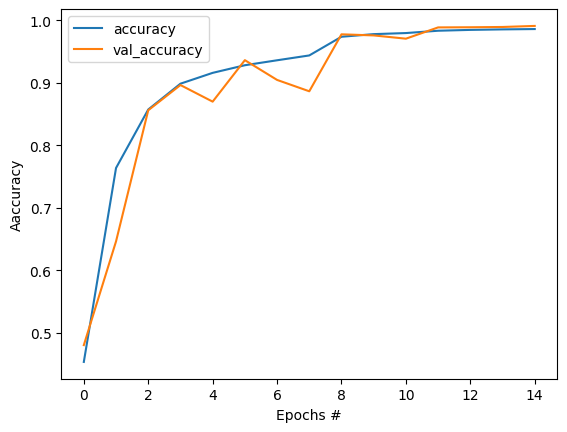

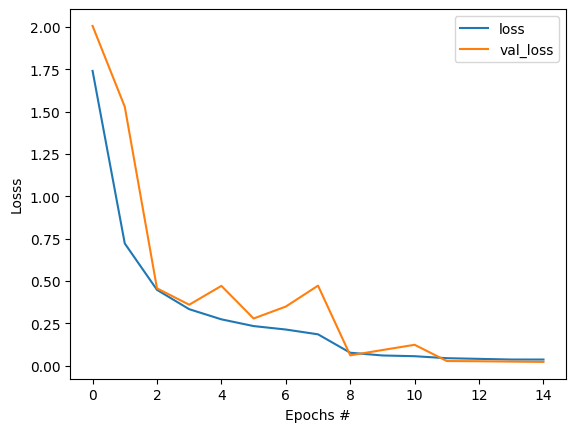

In [8]:
hist = history.history
def show_plt(type):
    if type == 1:
        plt.plot(hist["accuracy"], label="accuracy")
        plt.plot(hist["val_accuracy"], label="val_accuracy")
        plt.ylabel("Aaccuracy")
        plt.xlabel("Epochs #")
        plt.legend()
        plt.show()
    else:
        plt.plot(hist["loss"], label="loss")
        plt.plot(hist["val_loss"], label="val_loss")
        plt.ylabel("Losss")
        plt.xlabel("Epochs #")
        plt.legend()
        plt.show()
        
show_plt(1)
show_plt(0)

In [9]:
class_dict = train_generator.class_indices
li = list(class_dict.keys())
print(li)

['Blueberry___healthy', 'Blueberry_rust', 'Chilli_gemini', 'Chilli_healthy', 'Chilli_mosaic', 'Cucumber_blight', 'Cucumber_healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Lettuce_bacterial', 'Lettuce_downy', 'Lettuce_healthy', 'Lettuce_powdery', 'Lettuce_septoria', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [10]:
import numpy as np
#confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = CNN.predict(validation_generator)

y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names =li ## ['Peach___Bacterial_spot', 'Grape___Black_rot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

408/408 [==============================] - 32s 79ms/step
Confusion Matrix
[[17  8  5  6  3 16 14 19 17 18 10 20 18 25 22 21 13 13 16 10 19 17 12 15
  19 14 13 20 19 15]
 [18  9  8  4  9 10 21  8 15  8 10 11 14 12  9 25 15 22  9 14 16 21 17 12
   5 18 10 21 11 17]
 [ 7  6  6  3  2  6  7  3  9  7 11  6  8  6  5 10  9  8  9 11  5  8 11 10
  11  7  7  7 10  7]
 [11 10  5  5  4  6 10  5  5  6  8 11  9 13  7 13 13  8  8 12 10 10 13  8
   9 11  6 16  7 11]
 [ 6  8  2 10  6  9  7 12  6  6 11 11  9  5  7  8  8  3  7  5  8  9 11  9
   5  6 10  8  9  3]
 [12 18  5 11  6 19 11 17 22 11 10 20 10 17 14 15 17 12 14  7  9 19 12 15
  13 15 14 17 10 10]
 [23  9  8 11  8 10 19 12 12 13 10 17 19 14 12 16 13 11 13 11 13 11 15 10
  18 14 15 11  9 16]
 [17 12  9  7  9 15 15 17 15 18 25 14 29 14 19 26 17 26 11 16 14 12 14 13
  10 14 21 18 10 15]
 [12 13  8 15  9 15 20 11 16 11 17  8 21 15 14 20 18 22 30 21 11 23 17 17
  15  6 21 17 18 19]
 [14 13  4  9  4 14 12 15 16 15 10  8 22 23 19  9  9 16 11 13 14 20 11 

In [11]:
import os
from PIL import Image
import numpy as np
from keras.models import load_model
# Load the trained model
model = CNN

# Define the image size and preprocessing function
img_size = (224, 224)
def preprocess_image(img_path):
    img = Image.open(img_path).convert('RGB')
    img = img.resize(img_size)
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Set the path to the image folder
img_folder = test_dir
class_names = list(train_generator.class_indices.keys())
# Loop through all the images in the folder and make predictions
for filename in os.listdir(img_folder):
    img_path = os.path.join(img_folder, filename)
    img = preprocess_image(img_path)
    pred = model.predict(img)
    class_idx = np.argmax(pred)
    class_name = class_names[class_idx]
    print(f'Image: {filename}, Class: {class_name}')

1/1 [==============================] - 0s 347ms/step
Image: TomatoEarlyBlight6.JPG, Class: Tomato___Early_blight
1/1 [==============================] - 0s 22ms/step
Image: TomatoYellowCurlVirus4.JPG, Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
1/1 [==============================] - 0s 20ms/step
Image: TomatoYellowCurlVirus6.JPG, Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
1/1 [==============================] - 0s 22ms/step
Image: Chilli_gemini.png, Class: Chilli_gemini
1/1 [==============================] - 0s 22ms/step
Image: Chilli_healtty.png, Class: Chilli_healthy
1/1 [==============================] - 0s 21ms/step
Image: TomatoYellowCurlVirus5.JPG, Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
1/1 [==============================] - 0s 21ms/step
Image: Cucumber_healthy (2).png, Class: Cucumber_healthy
1/1 [==============================] - 0s 21ms/step
Image: TomatoYellowCurlVirus3.JPG, Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
1/1 [==============================] - 0s 22ms

In [12]:
#confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = CNN.predict(validation_generator)

y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(train_generator.class_indices.keys()) ## ['Peach___Bacterial_spot', 'Grape___Black_rot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

408/408 [==============================] - 31s 77ms/step
Confusion Matrix
[[16 16  9 11  9 12 13 17 13 14 17 13 15 16 15 19 16 17 18 10 15 15 21 23
  13 10 12 24 21 14]
 [10  9  8  8 13 13  9 11 15 13 11 12 18 11 17 15 10 18  4 18 22 10 16 16
  12 15 14 17 13 21]
 [ 6  5  5  4  2  5  6  5 14  5 13  7 10  6 12  9 10  8  9 11  5  2  7  5
  12  7 10  7  8  7]
 [12  9  5  8  2  7  7  8  7  9 12  8  9 11 11  9  6 10 10 10 14 12  9 10
   6  6  7 14 10 12]
 [12  6  1  8  2  7 11  8  5  3  4  6  7 13  7 10  5  7  9  9  6 12  4  9
   8  6 11 13  4 11]
 [ 9 22 10 10  7  8 12 12 20 12  9 16 18  9 13 19 15 13 22 12 15 11  8 15
  15 15 15 15  9 16]
 [21 15  8  7  7 11 16  9 15 10 12  5 16  9 15 22 15 11 12 19 14 16 13 13
  13 14 15 11 15 14]
 [12 14  9  8 12 12 15 15 15 14 19 16 26 17 24 18 17 21 12 14  8 24 19 17
  21 18 18 13 13 11]
 [18 19  6 11  6 17 20 22 23 10 19 23 17 11 22 15 13 16 17 16 12 20 20 17
  15  8 14 15 20 18]
 [15 20 11  3 11 12 10 19 15 19  9 12 16 19 16 24 13 10 13 14 13 11 13 